In [ ]:
from bs4 import BeautifulSoup
import requests      #This Python code extracts live trading data from a Sharesansar website using BeautifulSoup and requests libraries.
import pandas as pd
import matplotlib.pyplot as pl

url = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')
soup= requests.get(url)
soup

<ipython-input-17-5de2a8f7e72c>:6: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  url = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')


<Response [200]>

# **Data Extraction and Data Cleaning**

In [ ]:
soup.text ##gives the plain text content of the webpage after parsing it.

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <meta charset="utf-8">\n<meta name="viewport"\n    content="width=device-width, user-scalable=no, initial-scale = 1.0, minimum-scale=1.0, maximum-scale = 1.0">\n<meta name="keywords"\n    content=" sharesansar, sharesansar.com, share market, best site, nepali bazar, news, nepal, economics, politics, entertainment, business, politics, businessman, online news, real state, tax, banking, corporate, telecom,  nepse, ipo, agm, bond, Oil, Gold, profit, shareholder, NEPSE, pravhu, ILFC, Stock, exchange, citizen, nepal., loan, loss, provision,  arun, valley, kabeli,  Economy, Growth, Rate, Eid, Public, Holiday,  Mastercard, Standard, Chartered, Credit, Card, Visa, Warren, Buffett, Value, Investing,Nepal Stock Exchange (NEPSE) Live Trading Data, Floorsheet, Live Indices, Top Gainers, Top Losers, nepse, shareapp, limted, iporesult, bank , share, bank, company, promoter, bittya santha" />\n\n<title>Live Trading - || ShareSansar ||</title>\n<!--[if

In [ ]:
soup = BeautifulSoup(soup.text, "lxml")  #This code converts the plain text content of a webpage into a BeautifulSoup object using the lxml parser.
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no, initial-scale = 1.0, minimum-scale=1.0, maximum-scale = 1.0" name="viewport"/>
<meta content=" sharesansar, sharesansar.com, share market, best site, nepali bazar, news, nepal, economics, politics, entertainment, business, politics, businessman, online news, real state, tax, banking, corporate, telecom,  nepse, ipo, agm, bond, Oil, Gold, profit, shareholder, NEPSE, pravhu, ILFC, Stock, exchange, citizen, nepal., loan, loss, provision,  arun, valley, kabeli,  Economy, Growth, Rate, Eid, Public, Holiday,  Mastercard, Standard, Chartered, Credit, Card, Visa, Warren, Buffett, Value, Investing,Nepal Stock Exchange (NEPSE) Live Trading Data, Floorsheet, Live Indices, Top Gainers, Top Losers, nepse, shareapp, limted, iporesult, bank , share, bank, company, promoter, bittya santha" name="keywords"/>
<title>Live Trading - || ShareSansar ||</title>
<!--[if IE]><script src="http://

In [ ]:
soup= soup.table #This code isolates the table element from the parsed webpage and assigns it to the variable soup for further processing.
soup

<table class="table table-bordered table-striped table-hover dataTable compact" id="headFixed">
<thead>
<tr>
<th width="10px">S.No</th>
<th>Symbol</th>
<th class="text-center">LTP</th>
<th class="text-center">Point Change</th>
<th class="text-center">% Change</th>
<th class="text-center">Open</th>
<th class="text-center">High</th>
<th class="text-center">Low</th>
<th class="text-center">Volume</th>
<th class="text-center">Prev. Close</th>
</tr>
</thead>
<tbody>
<tr>
<td class="danger-index">
                                        1</td>
<td class="danger-index">
<a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
</td>
<td class="text-center danger-index">
                                        1,189.90</td>
<td class="text-center danger-index">
                                        -35.10</td>
<td class="text-center danger-index">
                                        -2.87</td>
<td class="text-center danger-index">
                                    

In [ ]:
data = []  # Initializes an empty list
tags = soup.find_all('tr')  # to finds all <tr> tags and assigns them to the list tags

header_row = tags[0]    #this line select the 1st element of the tags list
header_cells = header_row.find_all('th')  # to find all <th> (table header cells) within the header row
header = [cell.text.strip() for cell in header_cells]  # to extract text content of each header cell and strip whitespace
data.append(header)       #header list is appended to data list

for row in tags [1:]:     #Iterating through each <tr> tag  starting from 2nd element (index 1)
    row_data_list = []        #to store the text contents of cells
    row_data = row.find_all('td')  #to finds all <td> tags (table cells) within the current <tr> tag and assigns them to the list row_data

    for cell in row_data:     #iterating through each td within current tr tags

        cell_text = cell.text.strip()
        row_data_list.append(cell_text)    #to append text content of td to row_data_list

    data.append(row_data_list)     #to append row_data_list to current data list

for row in data:
    print(row)


['S.No', 'Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low', 'Volume', 'Prev. Close']
['1', 'ACLBSL', '1,189.90', '-35.10', '-2.87', '1,220.00', '1,220.00', '1,185.00', '15,602.00', '1,225.00']
['2', 'ADBL', '419.00', '16.90', '4.20', '405.00', '423.10', '400.00', '511,952.00', '402.10']
['3', 'ADBLD83', '1,090.00', '0.00', '0.00', '1,090.00', '1,090.00', '1,090.00', '50.00', '1,090.00']
['4', 'AHL', '702.40', '-27.60', '-3.78', '725.00', '730.00', '701.00', '18,268.00', '730.00']
['5', 'AHPC', '334.00', '22.00', '7.05', '318.20', '340.50', '317.60', '1,448,716.00', '312.00']
['6', 'AKJCL', '268.00', '10.00', '3.88', '263.10', '272.00', '254.80', '465,244.00', '258.00']
['7', 'AKPL', '318.00', '17.00', '5.65', '301.00', '326.00', '300.10', '1,297,606.00', '301.00']
['8', 'ALBSL', '1,102.40', '-21.60', '-1.92', '1,140.00', '1,146.00', '1,100.00', '20,841.00', '1,124.00']
['9', 'ALBSLP', '542.00', '0.00', '0.00', '542.00', '542.00', '542.00', '106,573.00', '542.00']
['10'

In [ ]:
import csv
file= open('Shareanalysis.csv','w')
x= csv.writer(file) #writing all data to csv file using object x
x.writerows(data)
file.close()

In [ ]:
pwd #checking where the file is located

'/content'

In [ ]:
df = pd.read_csv('Shareanalysis.csv', encoding= 'latin1') #reading data in csv file using pandas
df

,S.No,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
0,1,ACLBSL,"1,189.90",-35.10,-2.87,"1,220.00","1,220.00","1,185.00","15,602.00","1,225.00"
1,2,ADBL,419.00,16.90,4.20,405.00,423.10,400.00,"511,952.00",402.10
2,3,ADBLD83,"1,090.00",0.00,0.00,"1,090.00","1,090.00","1,090.00",50.00,"1,090.00"
3,4,AHL,702.40,-27.60,-3.78,725.00,730.00,701.00,"18,268.00",730.00
4,5,AHPC,334.00,22.00,7.05,318.20,340.50,317.60,"1,448,716.00",312.00
...,...,...,...,...,...,...,...,...,...,...
329,330,USHL,718.00,-9.10,-1.25,741.60,769.00,704.00,"18,360.00",727.10
330,331,USLB,"1,560.00",-40.20,-2.51,"1,632.20","1,632.20","1,560.00","12,502.00","1,600.20"
331,332,VLBS,984.10,-14.90,-1.49,999.00,999.00,981.00,"11,788.00",999.00
332,333,VLUCL,738.00,-28.00,-3.66,750.70,812.00,715.20,"113,065.00",766.00


In [ ]:
print(df.columns)

Index(['S.No', 'Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High',
       'Low', 'Volume', 'Prev. Close'],
      dtype='object')


In [ ]:
print("Columns Headers:", data[1:100])

Columns Headers: [['1', 'ACLBSL', '1,189.90', '-35.10', '-2.87', '1,220.00', '1,220.00', '1,185.00', '15,602.00', '1,225.00'], ['2', 'ADBL', '419.00', '16.90', '4.20', '405.00', '423.10', '400.00', '511,952.00', '402.10'], ['3', 'ADBLD83', '1,090.00', '0.00', '0.00', '1,090.00', '1,090.00', '1,090.00', '50.00', '1,090.00'], ['4', 'AHL', '702.40', '-27.60', '-3.78', '725.00', '730.00', '701.00', '18,268.00', '730.00'], ['5', 'AHPC', '334.00', '22.00', '7.05', '318.20', '340.50', '317.60', '1,448,716.00', '312.00'], ['6', 'AKJCL', '268.00', '10.00', '3.88', '263.10', '272.00', '254.80', '465,244.00', '258.00'], ['7', 'AKPL', '318.00', '17.00', '5.65', '301.00', '326.00', '300.10', '1,297,606.00', '301.00'], ['8', 'ALBSL', '1,102.40', '-21.60', '-1.92', '1,140.00', '1,146.00', '1,100.00', '20,841.00', '1,124.00'], ['9', 'ALBSLP', '542.00', '0.00', '0.00', '542.00', '542.00', '542.00', '106,573.00', '542.00'], ['10', 'ALICL', '792.00', '-7.00', '-0.88', '808.00', '808.00', '789.00', '122,9

# **Data Visualization**

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
fig = px.bar(df[0:10], x = 'Symbol', y = 'LTP') #displays a bar chart of  top 10 countries
fig.show()

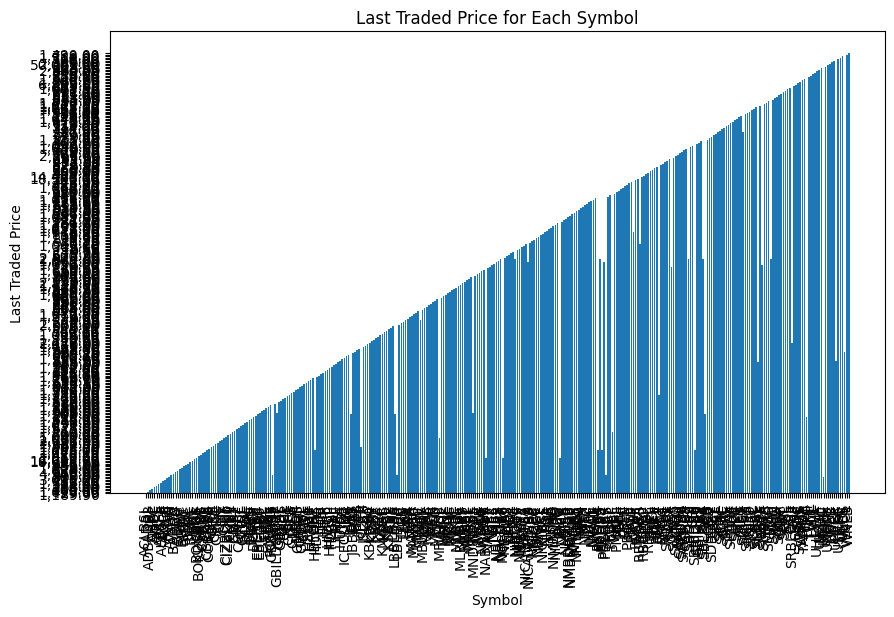

In [ ]:
import matplotlib.pyplot as plt

# Example: Plotting LTP (Last Traded Price) for each symbol
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(df['Symbol'], df['LTP'])
plt.xlabel('Symbol')
plt.ylabel('Last Traded Price')
plt.title('Last Traded Price for Each Symbol')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

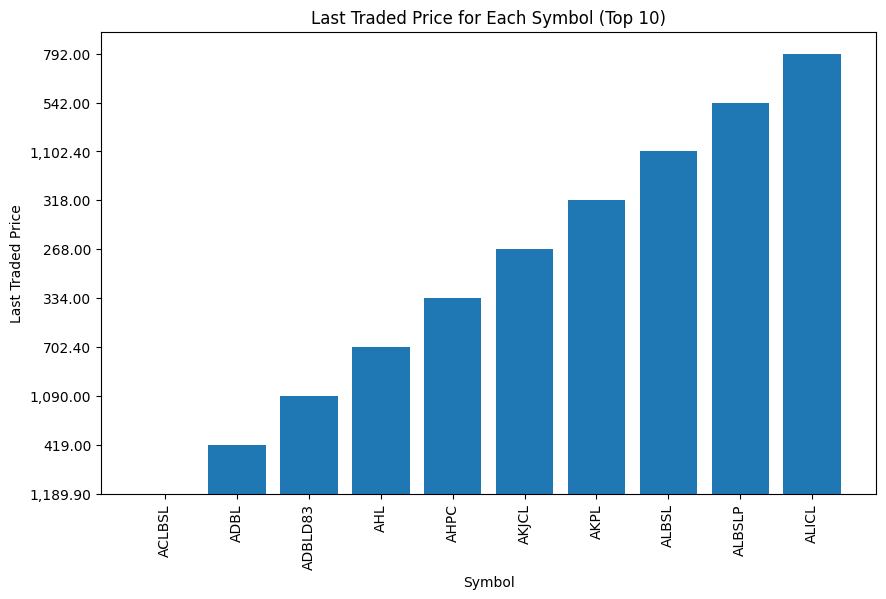

In [ ]:
# Assuming df is your cleaned DataFrame with appropriate column names and data types
# Example: Plotting LTP (Last Traded Price) for each symbol for the top 10 data points
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(df['Symbol'].head(10), df['LTP'].head(10))  # Selecting only the top 10 rows
plt.xlabel('Symbol')
plt.ylabel('Last Traded Price')
plt.title('Last Traded Price for Each Symbol (Top 10)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


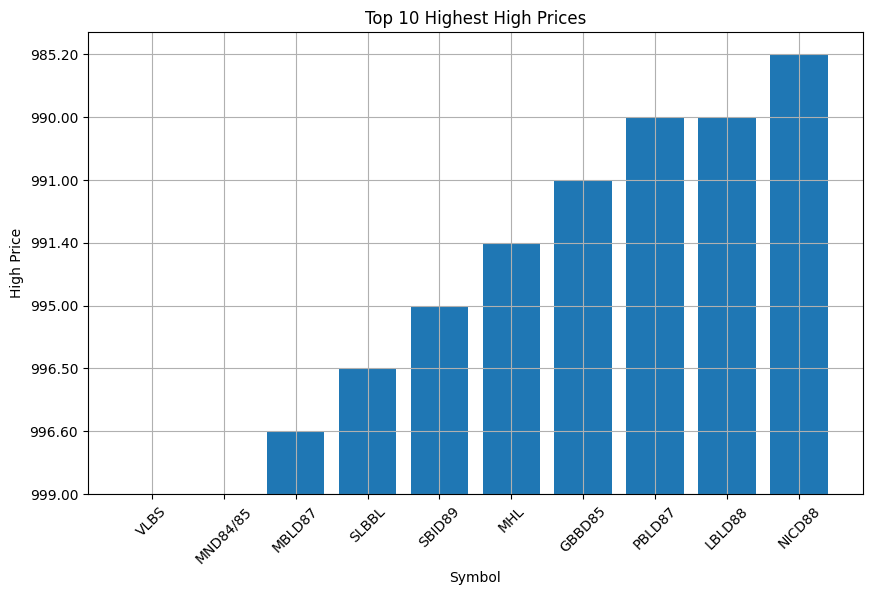

In [ ]:
# Sort the DataFrame by the 'High' column in descending order
df_sorted = df.sort_values(by='High', ascending=False)

# Select the top 10 rows
top_10 = df_sorted.head(10)

# Plotting the 'High' column for the top 10 rows
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_10['Symbol'], top_10['High'])
plt.title('Top 10 Highest High Prices')
plt.xlabel('Symbol')
plt.ylabel('High Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()


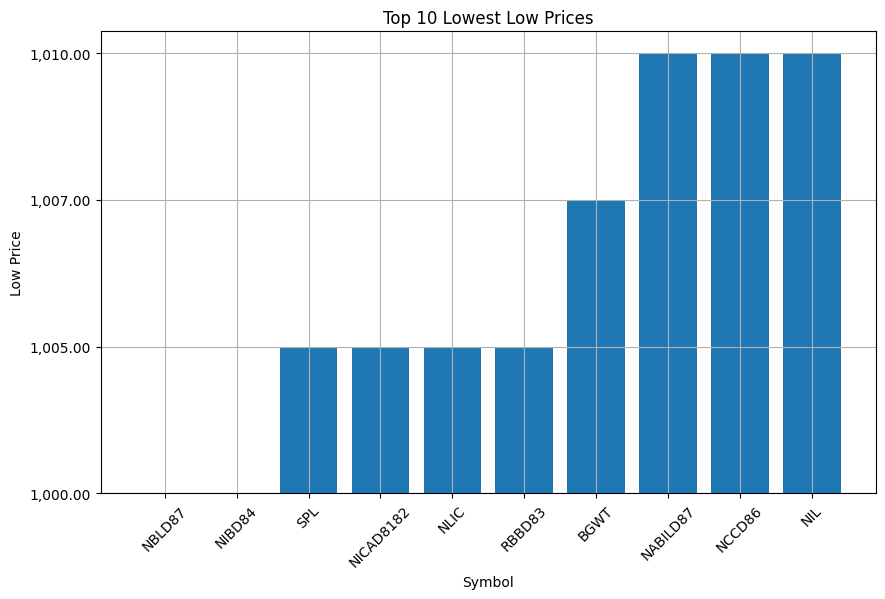

In [ ]:
# Sort the DataFrame by the 'Low' column in ascending order
df_sorted = df.sort_values(by='Low')

# Select the top 10 rows
bottom_10 = df_sorted.head(10)

# Plotting the 'Low' column for the top 10 rows
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(bottom_10['Symbol'], bottom_10['Low'])
plt.title('Top 10 Lowest Low Prices')
plt.xlabel('Symbol')
plt.ylabel('Low Price')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()


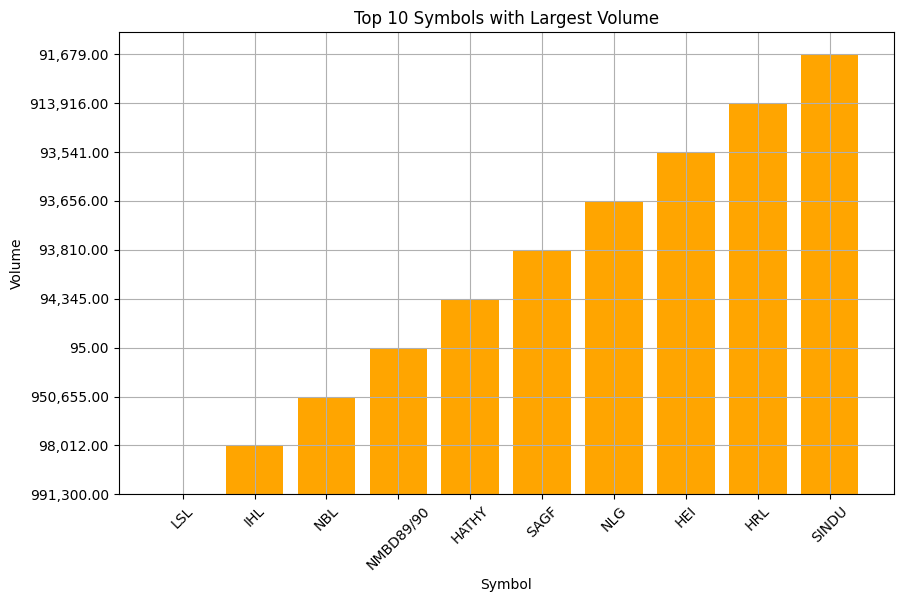

In [ ]:
# Sort the DataFrame by the 'Volume' column in descending order
df_sorted = df.sort_values(by='Volume', ascending=False)

# Select the top 10 rows
top_10_volume = df_sorted.head(10)

# Plotting the 'Volume' column for the top 10 rows
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_10_volume['Symbol'], top_10_volume['Volume'], color='orange')
plt.title('Top 10 Symbols with Largest Volume')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()


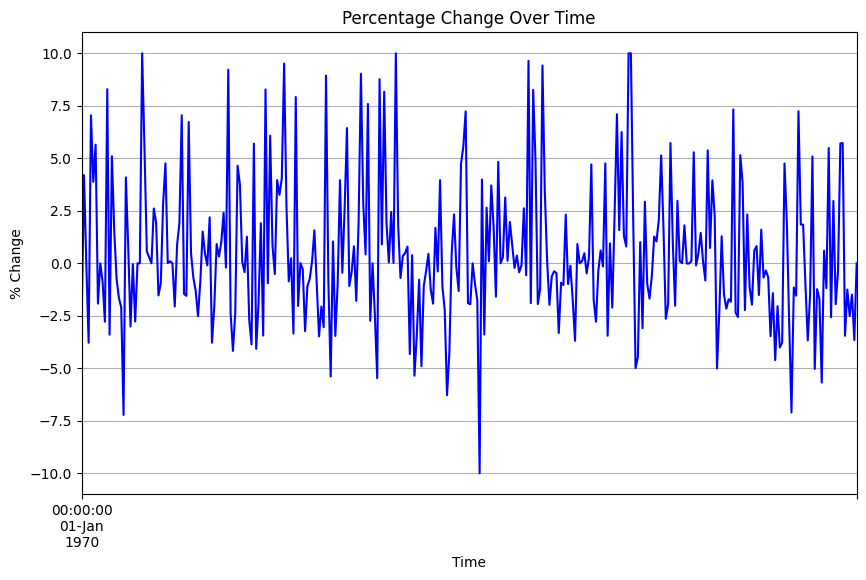

In [ ]:
# Convert the '% Change' column to numeric
df['% Change'] = pd.to_numeric(df['% Change'], errors='coerce')

# Drop rows with NaN values in the '% Change' column
df = df.dropna(subset=['% Change'])

# Set the index of the DataFrame
df.index = pd.to_datetime(df.index)

# Plotting the '% Change' column as a time series plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
df['% Change'].plot(color='blue')
plt.title('Percentage Change Over Time')
plt.xlabel('Time')
plt.ylabel('% Change')
plt.grid(True)
plt.show()